In [ ]:
# 課題8.1
'''
(1) 共通因子は四つと推定される。根拠は、5番目以降の固有値の変化率がほぼ一定でることである。
(2) ミント系、チョコレートチップが著しく高い共通性を示している。一方で、ミルクティーや抹茶は共通性が低く、独自因子の寄与が強いと推測される。
(3) 因子1：和風因子...マロンやあずきといった和風の味が著しい負の因子負荷量を示しているため。
　　因子2：ミント因子...ミント、チョコミントが非常に大きな負の因子負荷量を示しているため。
  　因子3：チョコレート因子...チョコレート系の味が特に大きな負の因子負荷量を示しているため。
　　因子4：ナッツ因子...アーモンドなど、ナッツ系統が強い因子負荷量を示しているため。
'''

In [1]:
import urllib.request

In [2]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/icecream_chosa.txt'
urllib.request.urlretrieve(url, 'icecream_chosa.txt')

('icecream_chosa.txt', <http.client.HTTPMessage at 0x199c43684e0>)

In [3]:
import pandas as pd
df = pd.read_csv('icecream_chosa.txt', sep='\s+', index_col=0)
df2 = df.iloc[:, 4:]
df2.head()

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,7,7,8,3,9,9,6,8,3,2,...,7,9,3,3,9,7,8,8,1,7
2,7,8,9,9,9,9,2,7,7,9,...,4,7,8,9,9,4,7,7,8,9
3,7,4,3,3,6,4,7,7,6,3,...,4,6,3,3,6,7,3,7,3,3
4,9,6,6,5,8,6,8,9,6,5,...,4,9,5,4,8,9,1,2,1,3
5,9,5,7,5,6,8,4,4,4,6,...,6,6,6,5,9,6,6,6,9,1


In [5]:
df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df3.head()

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.176843,0.285975,0.986901,-1.568505,1.201122,0.976997,0.557702,1.017604,-1.430286,-1.527790,...,0.942899,1.309485,-1.205746,-1.450150,0.811890,0.293979,0.605890,1.201419,-1.621162,0.518582
2,-0.176843,0.888029,1.535179,1.662750,1.201122,0.976997,-1.493615,0.511962,0.904875,1.422425,...,-0.721040,0.316511,1.280328,1.978776,0.811890,-1.385899,0.157082,0.713533,0.914734,1.348313
3,-0.176843,-1.520185,-1.754490,-1.568505,-0.759894,-1.544286,1.070531,0.511962,0.321085,-1.106330,...,-0.721040,-0.179977,-1.205746,-1.450150,-0.975758,0.293979,-1.638146,0.713533,-0.896620,-1.140880
4,1.312364,-0.316078,-0.109656,-0.491420,0.547450,-0.535773,1.583360,1.523246,0.321085,-0.263412,...,-0.721040,1.309485,-0.211316,-0.878662,0.216007,1.413897,-2.535760,-1.725896,-1.621162,-1.140880
5,1.312364,-0.918132,0.438622,-0.491420,-0.759894,0.472741,-0.467957,-1.004963,-0.846496,0.158047,...,0.388252,-0.179977,0.285899,-0.307175,0.811890,-0.265981,-0.291725,0.225647,1.277005,-1.970611


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FactorAnalysis

In [7]:
fa = FactorAnalysis()
fa.fit(df3)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [8]:
pd.DataFrame(fa.components_, columns=df3.columns)

,vanilla,strawberry,milk_tea,macadamia_nuts,cookie,chocolate,melon,coffee,almond,rum_raisin,...,banana,caramel,walnut,cassis,chocolate_chips,orange,green_tea,marron,chocolate_mint,adzuki-bean
0,0.125700,-0.277424,-0.476303,-0.592649,-0.442560,-0.464434,-0.093286,-0.420863,-0.526912,-0.129372,...,-0.466911,-0.589362,-0.621834,-0.453899,-0.475541,-0.112884,-0.392980,-0.519380,-0.342568,-0.483426
1,0.282777,0.102437,0.205108,0.014223,0.428033,0.029387,0.162294,0.153639,-0.054263,-0.151567,...,0.170954,0.120036,-0.074652,-0.036241,0.034018,0.019653,-0.127063,0.112490,-0.720415,0.216280
2,0.083269,-0.090719,0.122116,0.355519,-0.059434,-0.465442,-0.361891,-0.119208,0.021983,0.309373,...,-0.226602,-0.153639,0.244798,0.112362,-0.530070,-0.228993,0.365958,0.234004,-0.094730,0.216478
3,0.242895,0.137274,0.310240,-0.264847,-0.269201,-0.138073,0.097311,0.109933,-0.437827,0.051049,...,0.336163,0.166989,-0.303970,0.106151,-0.102422,0.076024,0.224843,0.320312,0.071609,0.086727
4,-0.245454,0.185508,0.165111,0.071592,-0.209695,-0.112943,0.359991,0.190403,0.066059,-0.080429,...,-0.010970,-0.014106,0.130865,0.256955,-0.228067,0.325092,0.004073,-0.255613,-0.122087,-0.149391
5,-0.106048,0.292352,-0.203409,-0.047070,-0.158707,0.127030,0.175947,-0.361565,-0.047883,-0.156920,...,-0.029501,0.017083,0.127606,-0.071140,-0.067888,0.042263,0.025402,0.120829,0.002977,0.313313
6,-0.228382,-0.145037,0.030248,-0.038224,0.011778,-0.161827,0.045614,-0.101095,0.083087,-0.040199,...,0.191865,0.235400,0.020294,-0.029711,-0.127893,-0.202361,-0.277090,0.079671,-0.003859,-0.022893
7,0.078817,0.254622,0.072571,0.038952,0.008918,-0.005605,0.102513,-0.105125,0.035678,0.277017,...,0.077932,-0.067056,-0.012082,-0.041351,0.038578,-0.193876,-0.056580,-0.084149,-0.013665,-0.075669
8,-0.104198,-0.044737,0.008117,0.053523,0.037439,0.067635,0.026511,-0.002545,-0.120129,-0.118611,...,0.092923,-0.156165,-0.006455,0.136367,0.000596,-0.182691,0.036127,-0.022892,0.006891,0.002680
9,0.028237,0.008235,0.047371,0.022939,0.000591,0.000234,-0.046024,-0.062195,-0.041428,-0.028340,...,-0.003004,0.013581,0.029525,0.023871,0.015111,0.036153,-0.039982,-0.012794,0.009859,-0.028693


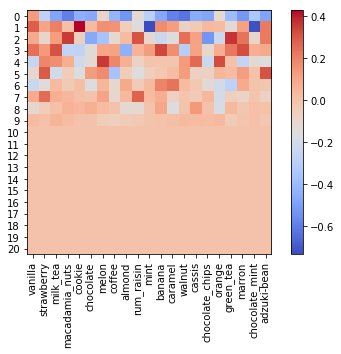

In [9]:
import numpy as np
fig = plt.figure(figsize=(6, 5))
plt.imshow(fa.components_, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xticks(np.arange(len(df3.columns)), df3.columns, rotation=90)
plt.yticks(np.arange(len(fa.components_)), range(len(fa.components_)))
plt.tight_layout()

In [10]:
pd.DataFrame(fa.components_, columns=df3.columns).apply(lambda x: x**2).apply(np.sum, axis=0)

vanilla            0.303214
strawberry         0.322352
milk_tea           0.457223
macadamia_nuts     0.561683
cookie             0.525853
chocolate          0.511949
melon              0.351438
coffee             0.419155
almond             0.503737
rum_raisin         0.262346
mint               0.656524
banana             0.464105
caramel            0.498219
walnut             0.579455
cassis             0.324076
chocolate_chips    0.593457
orange             0.292039
green_tea          0.438604
marron             0.533820
chocolate_mint     0.665712
adzuki-bean        0.462425
dtype: float64

In [11]:
pd.DataFrame(fa.components_, columns=df3.columns).apply(lambda x: x**2).apply(np.sum, axis=1)

0     3.818996
1     1.579125
2     1.354955
3     0.993858
4     0.704221
5     0.516328
6     0.358117
7     0.245841
8     0.137925
9     0.018021
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
dtype: float64

In [12]:
pd.DataFrame(fa.components_, columns=df3.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1)

0     0.181857
1     0.075196
2     0.064522
3     0.047327
4     0.033534
5     0.024587
6     0.017053
7     0.011707
8     0.006568
9     0.000858
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
dtype: float64

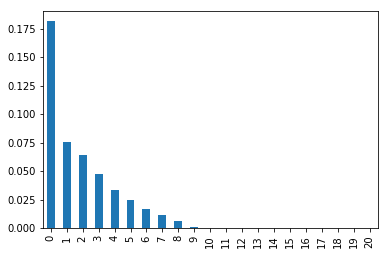

In [13]:
pd.DataFrame(fa.components_, columns=df3.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1).plot.bar()

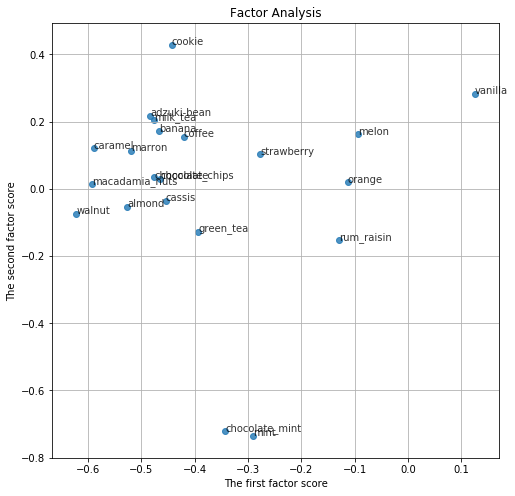

In [14]:
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_.T[:, 0], fa.components_.T[:, 1], df3.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(fa.components_.T[:, 0], fa.components_.T[:, 1], alpha=0.8)
plt.title("Factor Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.grid(True)
plt.show()

In [15]:
pd.DataFrame(fa.transform(df3))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.023887,1.973445,-1.095446,1.187066,-0.572422,0.178831,0.021795,-0.631557,0.030189,-0.119173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.558689,-0.063352,0.926206,-0.621661,-0.516235,-0.329460,-0.317019,0.488989,0.318749,0.155725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.465869,0.377197,-0.400501,-0.079012,0.139831,-0.084775,0.968758,-0.781886,-0.544246,-0.307012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.603296,1.100259,-1.232405,-0.597817,1.003848,-0.945041,0.349334,0.024177,-1.007527,0.038229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.146133,-1.303124,-0.582838,0.559467,-0.713215,-0.577524,-0.028927,0.295334,0.029013,0.325240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.236618,-1.731286,-0.580178,0.661272,1.079185,-0.559425,-0.089405,-0.274655,-0.316895,-0.065792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.586453,1.112851,-1.395810,0.022963,-0.042093,-0.030668,-0.172947,-0.355061,-0.392450,0.276985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.526919,-0.283943,1.109694,-0.238912,1.017481,-0.012408,0.002337,-0.238792,0.328325,-0.128009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.057908,-0.392654,-0.445749,-1.181609,0.387245,-0.271432,0.338758,-0.044671,0.106667,0.183953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.585200,0.939079,-1.045012,0.443258,0.877733,-1.208114,0.589168,-0.071817,1.070678,0.213806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


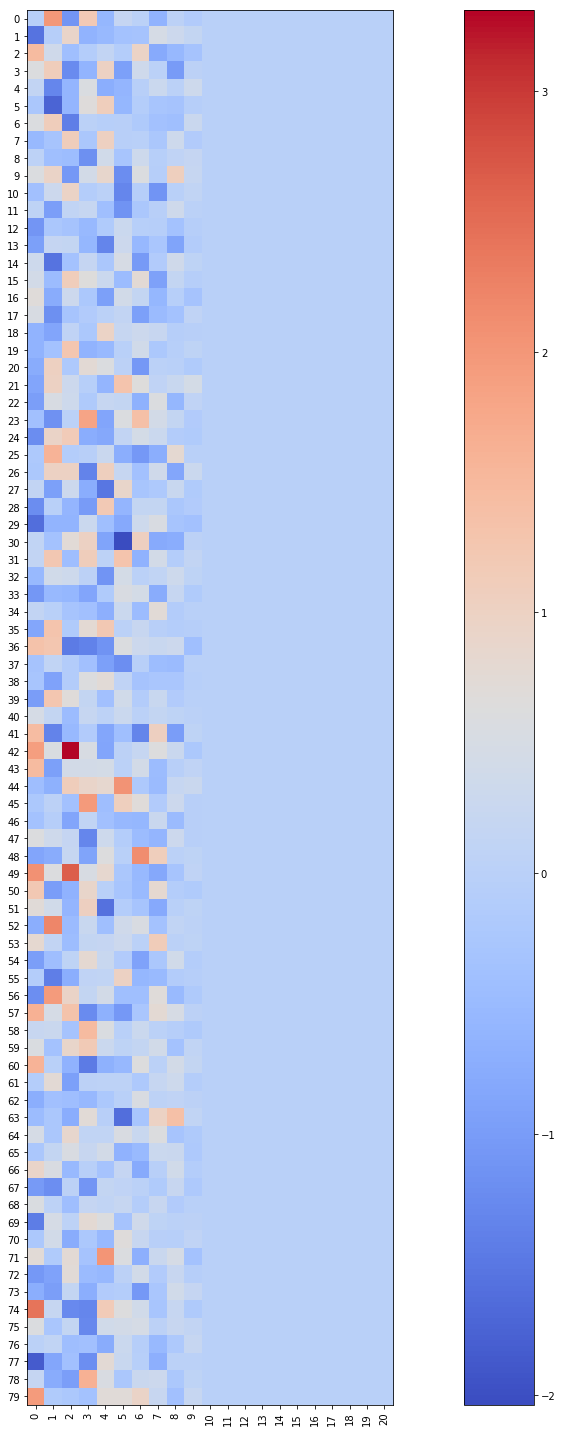

In [16]:
transformed = fa.transform(df3)
fig = plt.figure(figsize=(20, 20))
plt.imshow(transformed, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xticks(np.arange(len(fa.components_)), range(len(fa.components_)), rotation=90)
plt.yticks(np.arange(len(transformed)), range(len(transformed)))
plt.tight_layout()

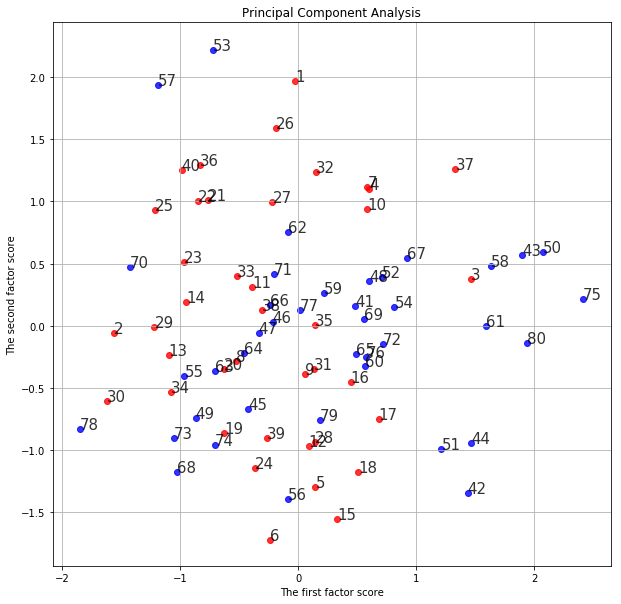

In [17]:
plt.figure(figsize=(10, 10))
for x, y, name in zip(transformed[:, 0], transformed[:, 1], df3.index):
    plt.text(x, y, name, alpha=0.8, size=15)
plt.scatter(transformed[:40, 0], transformed[:40, 1], alpha=0.8, color='red') # 女性は赤色
plt.scatter(transformed[40:, 0], transformed[40:, 1], alpha=0.8, color='blue') # 男性は青色
plt.title("Principal Component Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.grid()
plt.show()

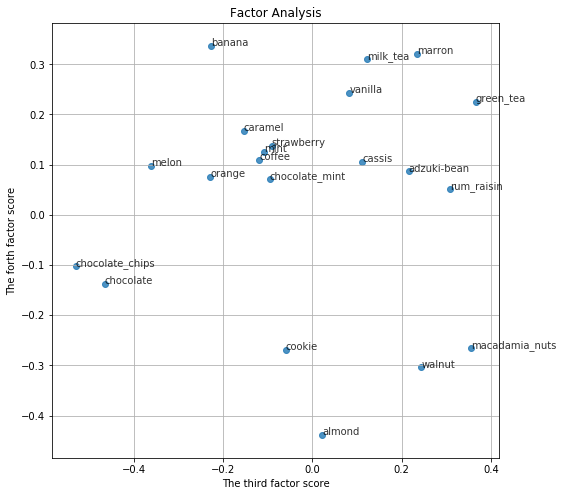

In [19]:
# 課題8.2
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_.T[:, 2], fa.components_.T[:, 3], df3.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(fa.components_.T[:, 2], fa.components_.T[:, 3], alpha=0.8)
plt.title("Factor Analysis")
plt.xlabel("The third factor score")
plt.ylabel("The forth factor score")
plt.grid(True)
plt.show()

In [22]:
'''
ミント系の味は他の群と大きく離れた位置に存在することから、「ミント因子」は客の好みに特異的に寄与することが分かる。
また、バニラはどの因子においても因子負荷量がゼロに近いことから、これらの因子にはあまり影響を受けないと考えられる。
'''

'\nミント系の味は他の群と大きく離れた位置に存在することから、「ミント因子」は客の好みに特異的に寄与することが分かる。\nまた、バニラはどの因子においても因子負荷量がゼロに近いことから、これらの因子にはあまり影響を受けないと考えられる。\n'